In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("../data/preprocessed_movie_sentences.csv")
df.head()

,sentence,rating
0,smart alert thirteen conversation one thing sm...,0
1,color musical bounce warm sea lapping island s...,0
2,massmarket entertainment uncompromising attemp...,0
3,lighthearted french film spiritual quest fashi...,0
4,wife actress ha moment looking comic effect je...,0


In [4]:
subj = df.loc[df['rating']==0]
fact = df.loc[df['rating']==1]
subj['rating'] = 0
fact['rating'] = 1

cat_df = pd.concat([subj, fact])

cat_df.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sentence,rating
0,smart alert thirteen conversation one thing sm...,0
1,color musical bounce warm sea lapping island s...,0
2,massmarket entertainment uncompromising attemp...,0
3,lighthearted french film spiritual quest fashi...,0
4,wife actress ha moment looking comic effect je...,0


In [5]:
cat_df['rating'].value_counts()

1    5000
0    5000
Name: rating, dtype: int64

In [6]:
X = cat_df.iloc[:, cat_df.columns != 'rating']
y = cat_df['rating']

X.head()

,sentence
0,smart alert thirteen conversation one thing sm...
1,color musical bounce warm sea lapping island s...
2,massmarket entertainment uncompromising attemp...
3,lighthearted french film spiritual quest fashi...
4,wife actress ha moment looking comic effect je...


In [7]:
bow_transformer = CountVectorizer(max_features = 800)
bow = bow_transformer.fit_transform(X['sentence'])
X = pd.DataFrame(bow.toarray(), columns = bow_transformer.get_feature_names())

In [8]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns = col_names)

X.head()

,ability,able,across,act,acting,action,actor,actress,actually,adult,...,writing,wrong,year,yearold,yet,york,youll,young,youre,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [10]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.8216


In [11]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.8707587229419631


In [12]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.8432


In [13]:
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.9163440689500205


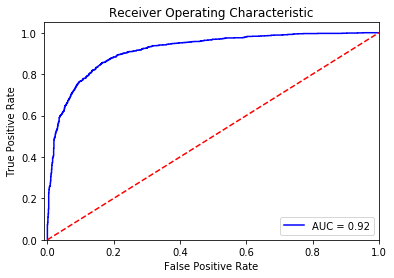

In [14]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1271
           1       0.84      0.85      0.84      1229

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



In [16]:
print('F1 score: ', f1_score(y_test, y_pred))

F1 score:  0.841552142279709


In [17]:
y_pred = [1] * y_test.shape[0]
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.4916


In [18]:
y_pred = [0] * y_test.shape[0]
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.5084


In [19]:
#Multiclass classification
df['rating'].describe()


count    10000.000000
mean         0.500000
std          0.500025
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: rating, dtype: float64

In [20]:
# plt.hist(df['rating'])

In [21]:
#TFIDF
X = cat_df.iloc[:, cat_df.columns != 'rating']
y = cat_df['rating']
X.head()

,sentence
0,smart alert thirteen conversation one thing sm...
1,color musical bounce warm sea lapping island s...
2,massmarket entertainment uncompromising attemp...
3,lighthearted french film spiritual quest fashi...
4,wife actress ha moment looking comic effect je...


In [22]:
tfidf_transformer = TfidfVectorizer(max_features=800)
tfidf = tfidf_transformer.fit_transform(X['sentence'])

X = pd.DataFrame(tfidf.toarray(), columns=tfidf_transformer.get_feature_names())

In [23]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
# Defining Model
mnb = MultinomialNB()
# Training Model
mnb.fit(X_train, y_train)
# Making Predictions
y_pred = mnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8516


In [26]:
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.9281512414063746


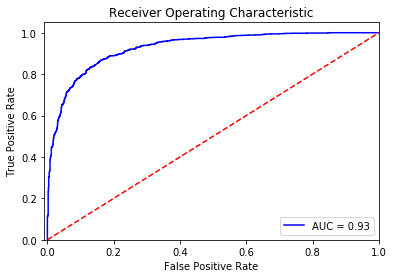

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1271
           1       0.84      0.86      0.85      1229

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



In [29]:
print('F1 score: ', f1_score(y_test, y_pred))

F1 score:  0.8503428801936264


In [30]:
#SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
# Making Predictions
y_pred = svm.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8476


In [31]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1271
           1       0.84      0.85      0.85      1229

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



In [32]:
print('F1 score: ', f1_score(y_test, y_pred))


F1 score:  0.8450589670597805


In [33]:
#Ensemble classifiers
from sklearn.ensemble import VotingClassifier

estimators = [('svm', svm),
              ('naivebayes', mnb),
              ('gnb', gnb)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble = ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_ensemble))

Accuracy Score:  0.8268
